In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
R1, R2, R3 = 3, 2, 1  # radii of the three circles

In [3]:
# Create a mesh grid for the 3-torus
u = np.linspace(0, 2*np.pi, 50)
v = np.linspace(0, 2*np.pi, 50)
w = np.linspace(0, 2*np.pi, 50)
u, v, w = np.meshgrid(u, v, w)

In [4]:
# Define the 3-torus surface
x = (R1 + R2*np.cos(v)) * np.cos(u)
y = (R1 + R2*np.cos(v)) * np.sin(u)
z = R2 * np.sin(v)

In [5]:
# Define a linear flow on the 3-torus
# Using irrational coefficients to ensure dense orbits
a, b, c = np.pi, np.sqrt(2), np.sqrt(3)
norm = np.sqrt(a**2 + b**2 + c**2)
a, b, c = a/norm, b/norm, c/norm

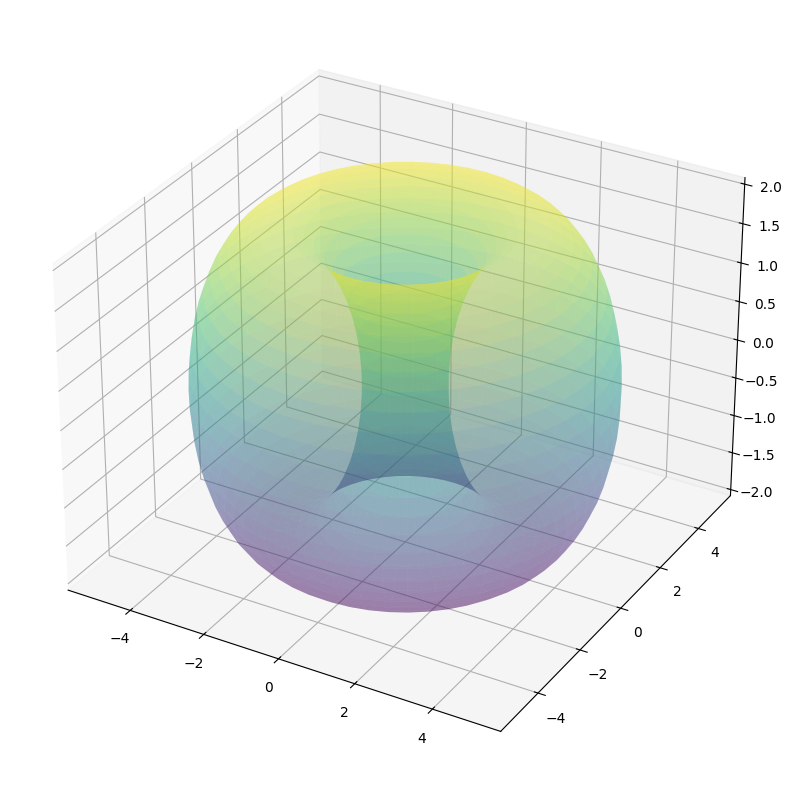

In [6]:
def flow(t, x0, y0, z0):
    u = (x0 + a*t) % (2*np.pi)
    v = (y0 + b*t) % (2*np.pi)
    w = (z0 + c*t) % (2*np.pi)
    return ((R1 + R2*np.cos(v)) * np.cos(u),
            (R1 + R2*np.cos(v)) * np.sin(u),
            R2 * np.sin(v) + R3 * np.sin(w))

# Create the 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot a slice of the 3-torus surface
ax.plot_surface(x[:,:,0], y[:,:,0], z[:,:,0], alpha=0.3, cmap='viridis')

# Simulate and plot multiple trajectories
n_trajectories = 5
colors = plt.cm.rainbow(np.linspace(0, 1, n_trajectories))

In [8]:
for i, color in enumerate(colors):
    t = np.linspace(0, 100, 1000)
    x0, y0, z0 = np.random.rand(3) * 2*np.pi
    trajectory = np.array([flow(ti, x0, y0, z0) for ti in t])
    ax.plot(trajectory[:,0], trajectory[:,1], trajectory[:,2], color=color, linewidth=1)

    # Add vector field visualization
t_sample = np.linspace(0, 2*np.pi, 10)
u_sample, v_sample = np.meshgrid(t_sample, t_sample)
x_sample = (R1 + R2*np.cos(v_sample)) * np.cos(u_sample)
y_sample = (R1 + R2*np.cos(v_sample)) * np.sin(u_sample)
z_sample = R2 * np.sin(v_sample)

u_direction = -a * np.sin(u_sample) + b * np.cos(u_sample)
v_direction = a * np.cos(u_sample) + b * np.sin(u_sample)
w_direction = c * np.ones_like(u_sample)

ax.quiver(x_sample, y_sample, z_sample, 
          u_direction, v_direction, w_direction, 
          length=0.5, normalize=True, color='r', alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Riemannian Flow on a 3-Torus (Case iv of Theorem 2.23)')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>